In [2]:
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

input_shape = (28, 28, 1)
num_classes = 10

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# normalize the dataset and make image in range 0 -> 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test:  ", x_test.shape)
print("y_test:  ", y_test.shape)


11490434/11490434 [==============================] - 0s 0us/step
x_train:  (60000, 28, 28)
y_train:  (60000,)
x_test:   (10000, 28, 28)
y_test:   (10000,)


In [3]:
# the model take images as volumes (height * width * channels)
# minist is 2 dimension only so we will expand images to be in 3 dimensoins (volume)

x_train = np.expand_dims(x_train, -1) # -1 to add one dimensoin as last dimension
x_test  = np.expand_dims(x_test, -1)
print("x_train: ", x_train.shape)
print("x_test:  ", x_test.shape)

x_train:  (60000, 28, 28, 1)
x_test:   (10000, 28, 28, 1)


# For CNN we need the labels for each sample to be in one-Hot Encoding not just one label
so we have 10 classes so the last layer will be made of 10 neurons
so the label for input sample will be as a vector that represent all last layer neurons where the correct class will take 1 and
all others neurons have 0 for this sample




In [4]:
print(" the first train sample label before one-Hot Encoding: ", y_train[0])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(" the first train sample label After one-Hot Encoding: ", y_train[0])


 the first train sample label before one-Hot Encoding:  5
 the first train sample label After one-Hot Encoding:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**Building the CNN Model**

First part ( Feature Extraction ) by convolution layers then pooling

each layer :
*   convolution with filter
*   Relu
*   pooling between each layer









In [8]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dropout_1 (Dropout)         (None, 800)              

***first convolution layer***
  output is 26 * 26 as dimension and * 32 as num of filters or mum of output images or num of feature maps so we have 32 feature maps made by using 32 different filter so total output is 26*26*32 = new_width*new_height*num_of feature_maps_theat_each_one_of_them_have_dimension=26*26

  num of parameters = [3*3 + 1 ] * 32 = [filter_size + bias ] *num of filters


**first pooling** make downsamplign without taking any parameters
 output = 13*13*32


**second convolution layer**
 input 13*13*32  output 11*11*32

 num of parameters = [3*3 * 32 +1 ]* 64  = [filter_size * num_of_feature_maps_that_kernal_applied + bias ] * num_of_filters_in_this_layer
 - we consider the kernal size as 3*3*32 as input


**second pooling** make downsampling to half of size

**flatten** make the output as one_dimension array

dropout dosn't reduce features or any thing it just enhance speed of training and prevent the co-dependency between neurons


**Dense function:**
 have 10 output final layers with softmax funciotn
 num of parameters is 10 * 1600 + 10 = 10 output parameters * 1600 input parameters + 10 bias for each output neuron in last layer
 10 * 1600 bec this is fully connected (Dense) Layer



# **Train The Model**

In [9]:
batch_size = 120  # update weights every 120 images not for each image ( batch mode that can be as one update for all samples )
epochs = 2 # num of ebocs ( num of trains on all data)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=120, epochs=2, validation_split=0.1)

# categorical crossentropy loss function bec we compute loss on probabilities and we have more than tow classes
# Adam optimization algorithm is an extension to stochastic gradient descent for weight update
# validation data : split 10% of training data as validation data


Epoch 1/2
450/450 [==============================] - 32s 70ms/step - loss: 0.4490 - accuracy: 0.8588 - val_loss: 0.0995 - val_accuracy: 0.9727
Epoch 2/2
450/450 [==============================] - 30s 66ms/step - loss: 0.1434 - accuracy: 0.9558 - val_loss: 0.0664 - val_accuracy: 0.9808


In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss: ", score[0])
print("Test Accuricy: ", score[1])


Test Loss:  0.06762057542800903
Test Accuricy:  0.9782999753952026


In [27]:
def show_images(images, real_labels, prediction_labels):
    size = images.shape[0]
    #plt.figure(figsize=(5, size // 5))
    for i in range(size):
        plt.subplot(5, size//5, i + 1)
        plt.imshow(images[i].reshape(28, 28))
        #plt.title(f"Predicted: {prediction_labels[i]}, Real: {real_labels[i]}")  # Updated title format
    #plt.subplots_adjust(wspace=5, hspace=7)  # Add spaces between subplots
    plt.show()



1/1 [==============================] - 0s 23ms/step


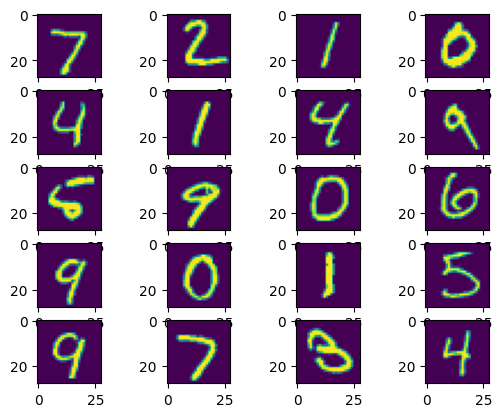

predicted classes:   [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [28]:
prediction = model.predict(x_test[:20]) # this will return prediction classes as binary vector bec the one-hot
# so we will convert the class result as one class
y_classes = prediction.argmax(axis=-1) # take the index of max argument
show_images(x_test[:20], y_test[:20], y_classes)
print("predicted classes:  ", y_classes)

**Print Filters**

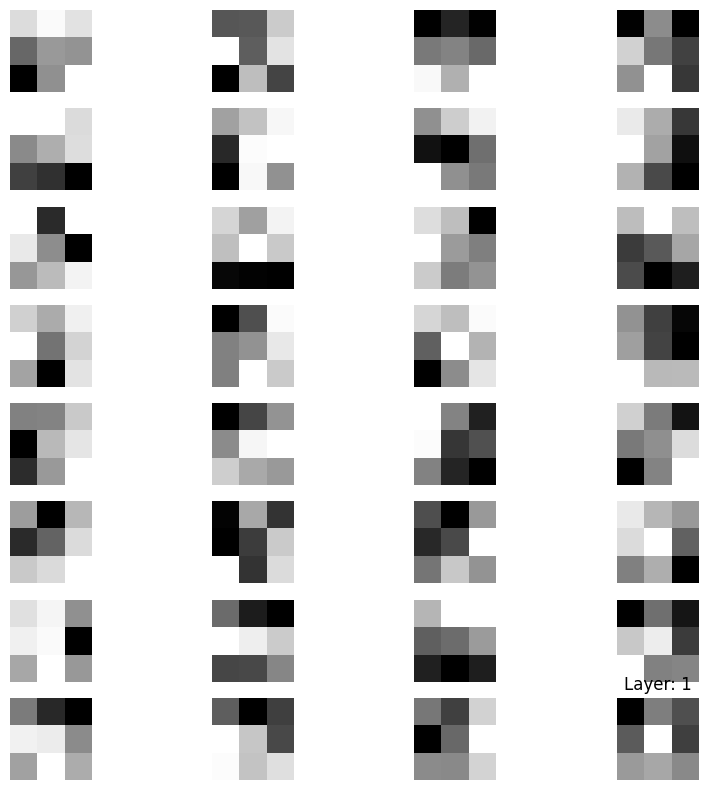

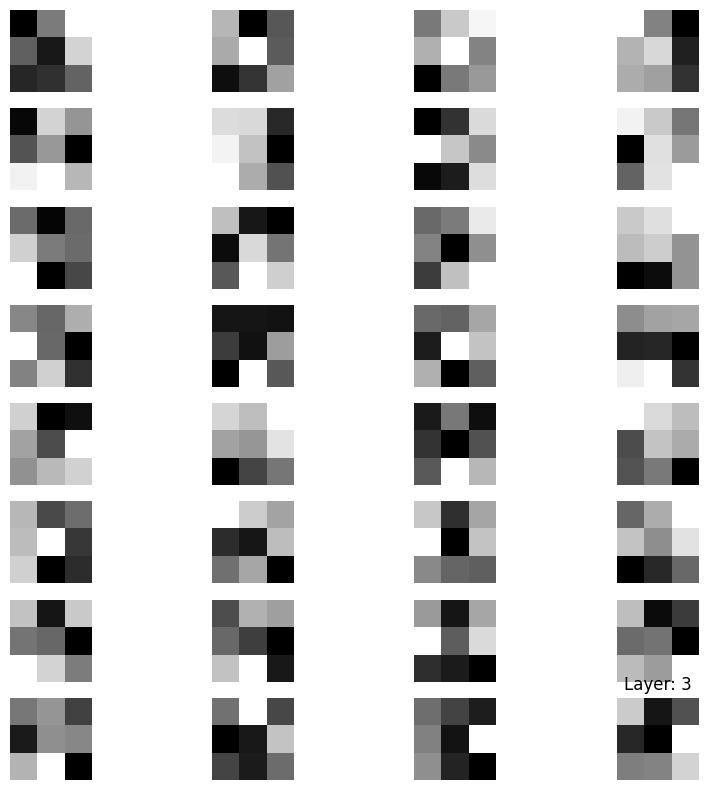

In [34]:
# Get the number of layers in the model
num_layers = len(model.layers)

# Iterate through each layer in the model
for i in range(num_layers):
    # Check if the layer is a convolutional layer
    if isinstance(model.layers[i], keras.layers.Conv2D):
        # Get the weights of the current convolutional layer
        kernel_weights, _ = model.layers[i].get_weights()

        # Plot the filters for the current layer
        fig = plt.figure(figsize=(10, 10))
        for j in range(kernel_weights.shape[-1]):
          ax = fig.add_subplot(8, 4, j+1)
          ax.imshow(kernel_weights[:, :, 0, j], cmap='gray')  # Assuming single channel filters
          ax.axis('off')
        plt.title(f'Layer: {i+1}')
        plt.show()

**Feature Maps**

1/1 [==============================] - 0s 110ms/step


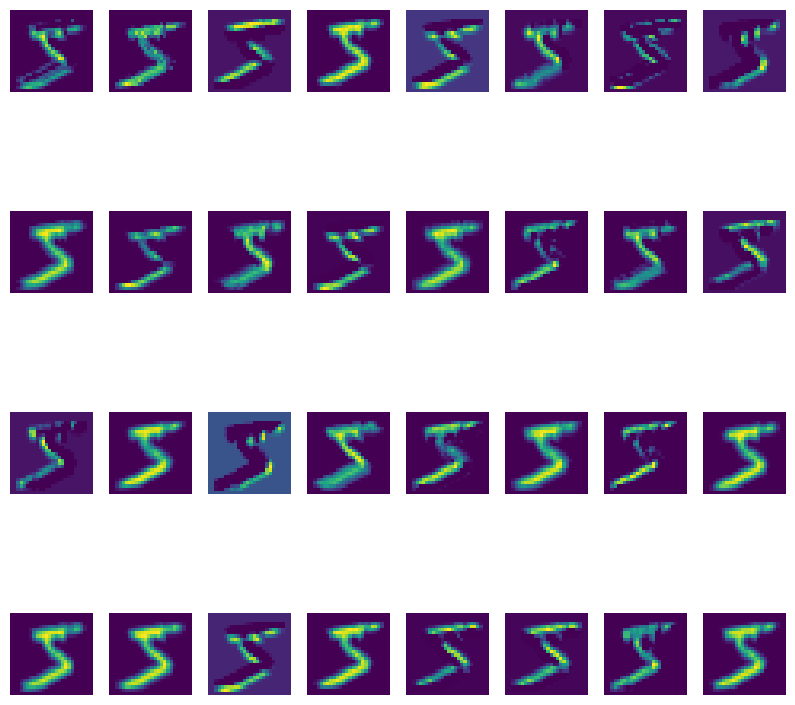

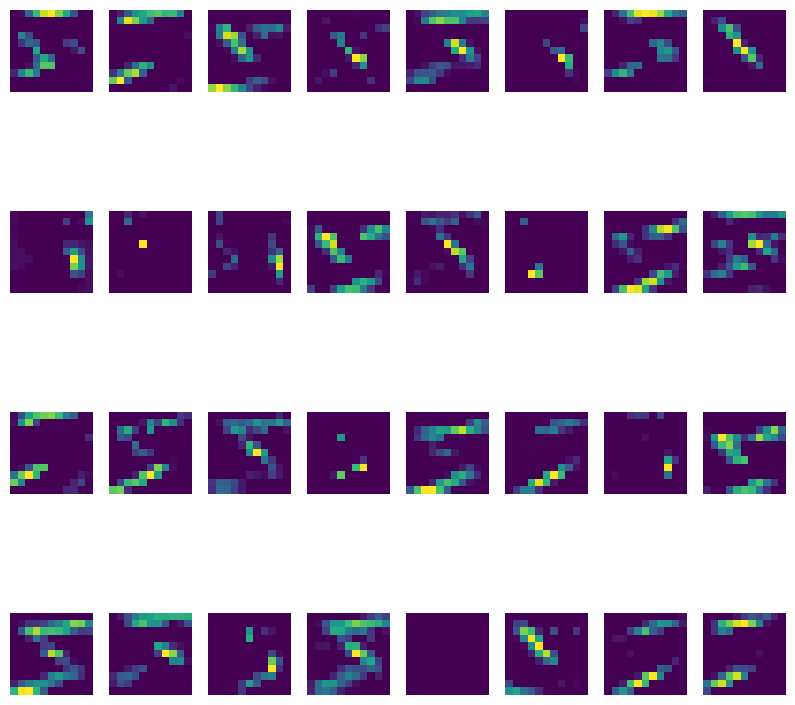

In [39]:
# Show feature maps
layer_outputs = [layer.output for layer in model.layers] # output of layers ( the feature maps)
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)
# activation model" refers to a modified version of a neural network model that outputs the activations (or feature maps) of each layer, rather than the final predictions.
#  These activations represent the responses of neurons in each layer to the input data.

activations = activation_model.predict(x_train[:1]) # predicts activations for the first training sample
for i, activation in enumerate(activations):
    if isinstance(model.layers[i], keras.layers.Conv2D):
        plt.figure(figsize=(10, 10))
        for j in range(model.layers[i].filters):
            plt.subplot(4, 8, j+1)
            plt.imshow(activation[0, :, :, j], cmap='viridis')
            plt.axis('off')
        plt.show()

# activation[0, :, :, j]: This represents the feature map of a particular filter (j) from the activation of a specific layer. The indexing [0, :, :, j]
# selects the first sample (since we're showing activations for one sample at a time), and then selects all rows and columns of the feature map for the j-th filter.

# cmap='viridis': This parameter specifies the colormap used for mapping the values in the image to colors. In this case, the 'viridis' colormap ranges from yellow to blue,
# with increasing intensity representing increasing values.

